In [43]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn import model_selection,preprocessing
from sklearn import  metrics
from ClassPerceptron import Perceptron

In [49]:
datos = pd.read_csv("Semillas.csv")
mapeo = {'Clase': {'Tipo1':0, 'Tipo2':1,'Tipo3':2}}
datos.replace(mapeo,inplace=True)
# datos = datos.drop(columns="Perimetro")
# datos = datos.drop(columns="Area")
print(datos.corr())

X = np.array(datos.iloc[:,:-1])
print(X)
T = np.array(datos['Clase'] == "Tipo3") * 1
print(T)
# T = np.array(datos["Clase"])
normalizador= preprocessing.StandardScaler()
X= normalizador.fit_transform(X)

                 Area  Perimetro  Compacidad  LongNucleo  AnchoNucleo  \
Area         1.000000   0.994341    0.608288    0.949985     0.970771   
Perimetro    0.994341   1.000000    0.529244    0.972422     0.944829   
Compacidad   0.608288   0.529244    1.000000    0.367915     0.761635   
LongNucleo   0.949985   0.972422    0.367915    1.000000     0.860415   
AnchoNucleo  0.970771   0.944829    0.761635    0.860415     1.000000   
Asimetria   -0.229572  -0.217340   -0.331471   -0.171562    -0.258037   
LongSurco    0.863693   0.890784    0.226825    0.932806     0.749131   
Clase       -0.346058  -0.327900   -0.531007   -0.257269    -0.423463   

             Asimetria  LongSurco     Clase  
Area         -0.229572   0.863693 -0.346058  
Perimetro    -0.217340   0.890784 -0.327900  
Compacidad   -0.331471   0.226825 -0.531007  
LongNucleo   -0.171562   0.932806 -0.257269  
AnchoNucleo  -0.258037   0.749131 -0.423463  
Asimetria     1.000000  -0.011079  0.577273  
LongSurco    -0.0110

C:\Users\facus\AppData\Local\Temp\ipykernel_14224\1871816930.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace(mapeo,inplace=True)


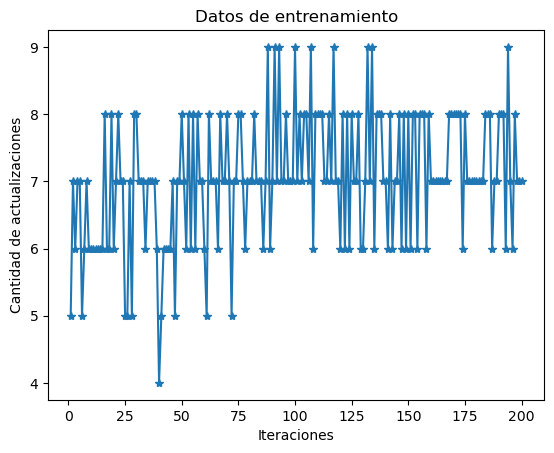

In [44]:
ppn = Perceptron(alpha=0.05, n_iter=200, draw=0, random_state=None)
ppn.fit(X,T)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [45]:
Y_pred = ppn.predict(X)
aciertos = metrics.accuracy_score(Y_pred,T)

print("%% accuracy = %.3f" % (aciertos * 100))

report = metrics.classification_report(Y_pred,Y_pred)
print("Resultado de la clasificación:\n%s" % report)

#Para el tipo 2 Funciona con un 100% de accuracy

% accuracy = 95.714
Resultado de la clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        79

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

